# Project on Prediction of Stock Price of Google 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [31]:
df = pd.read_csv("/content/drive/MyDrive/145-6-train-data-Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [32]:
training_set = df.iloc[:, 1:2].values

In [33]:
from sklearn.preprocessing import MinMaxScaler   
sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)


In [34]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

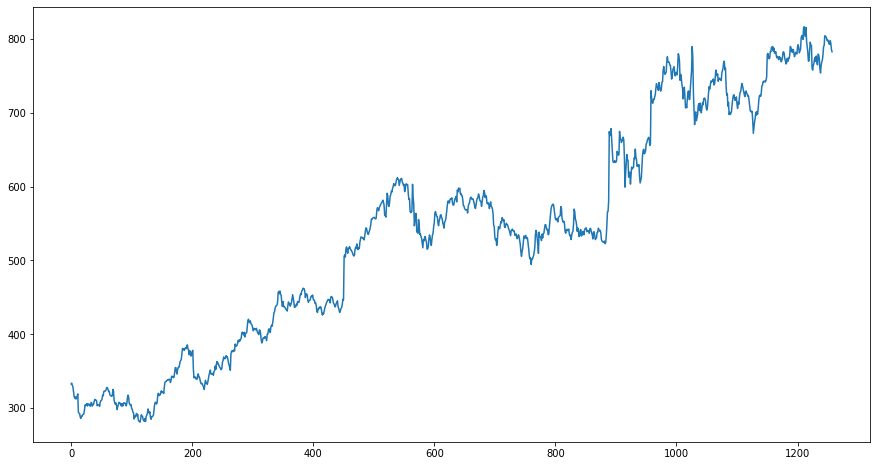

In [35]:
df['High'].plot(figsize = (15,8))
plt.show()

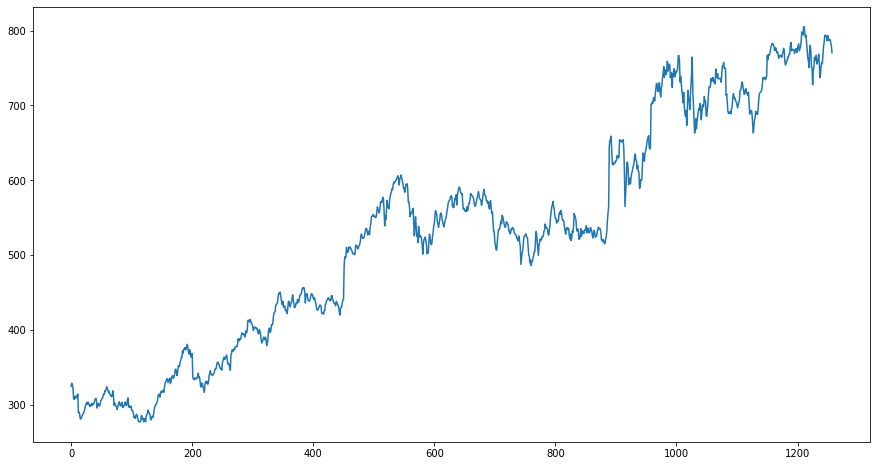

In [36]:
df['Low'].plot(figsize = (15,8))
plt.show()

In [37]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))    

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))   

model.add(LSTM(units = 50))
model.add(Dropout(0.2))


model.add(Dense(units = 1))

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 111ms/step - loss: 0.1014
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0068
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 13/100

In [39]:
dataset_test = pd.read_csv('/content/drive/MyDrive/145-6-test-data-Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [40]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

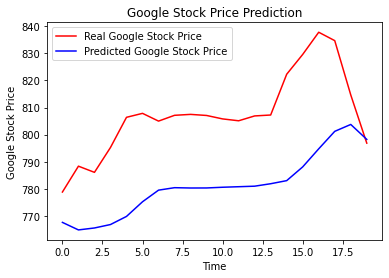

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()